In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('medical_examination.csv')

In [5]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#add an overweight column

#calculate bmi 
df['BMI']= df['weight']/(df['height'] / 100)**2 
#if its greater than 25 they are overwight 
df['overweight'] = np.where(df['BMI'] > 25, 1, 0)
#distribution
df['overweight'].value_counts()

overweight
1    43546
0    26454
Name: count, dtype: int64

In [8]:
#normalize the data 
#make 0 always good and 1 always bag 
df['cholesterol'] = np.where(df['cholesterol'] > 1, 1, 0)
df['gluc'] = np.where(df['gluc'] > 1, 1, 0)


In [16]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


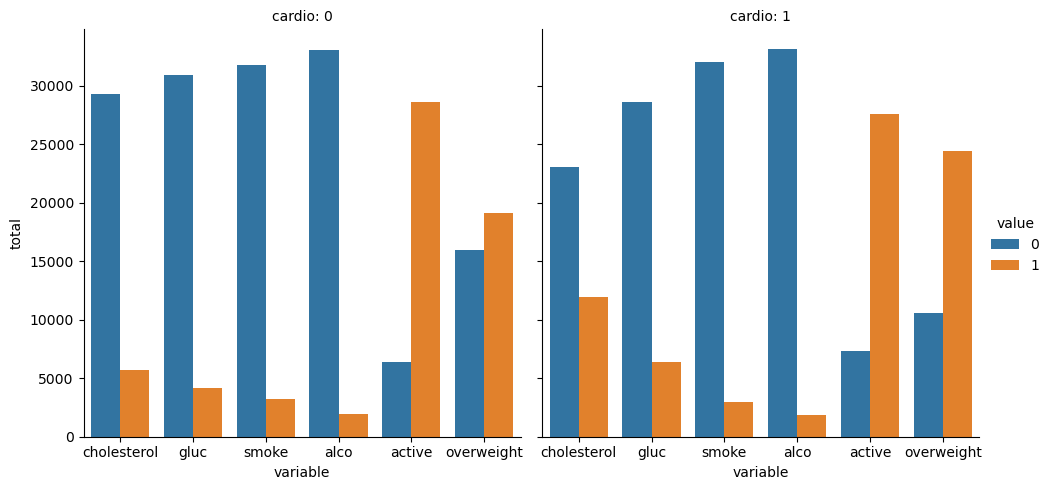

<Figure size 1000x600 with 0 Axes>

In [41]:
# draw a categorical plot 
df_cat = pd.melt(df, value_name='value', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], id_vars=['cardio'])


# draw the catplot
g = sns.catplot(x='variable', hue='value', col='cardio', data=df_cat, kind='count', height=5, aspect=1)
g.set_axis_labels('variable', 'total')
g.set_titles('cardio: {col_name}')
g.set_xticklabels(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
plt.show()
fig = plt.figure(figsize=(10, 6))


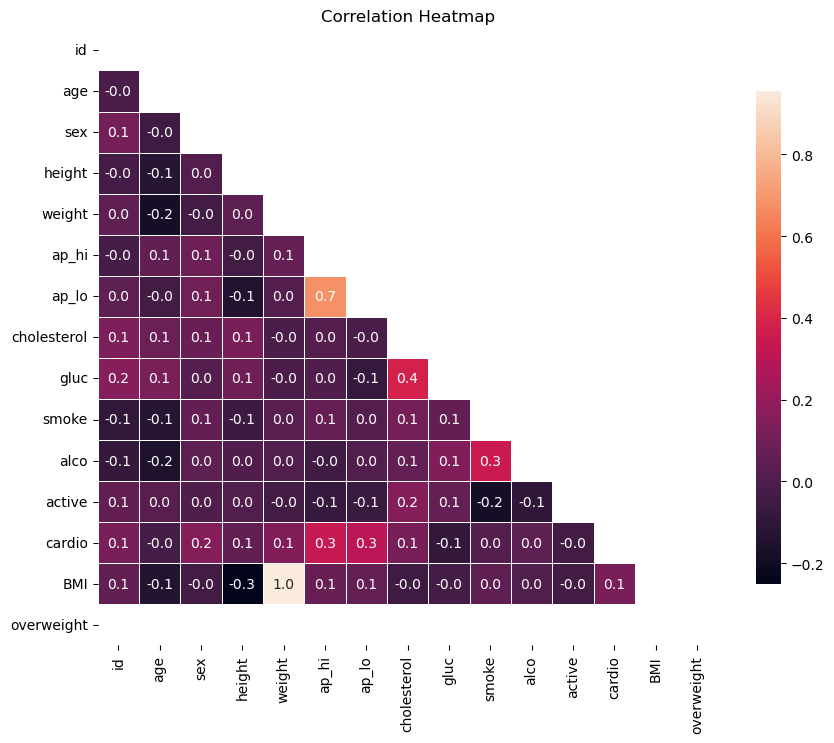

In [40]:
#draw the heat map 
#filtering the data 

## keep if the following condictions are met 
ap_bool = df['ap_lo']<= df['ap_hi']
height_bool = (df['height']>=df['height'].quantile(0.025)) & (df['height']>=df['height'].quantile(0.975))
weight_bool = (df['weight']>=df['weight'].quantile(0.025)) & (df['weight']>=df['weight'].quantile(0.975))

df_heatmap = df[(ap_bool) & (height_bool) & (weight_bool)]

#correlation matrix
corr = df_heatmap.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', linewidths=0.5, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap')

plt.show()